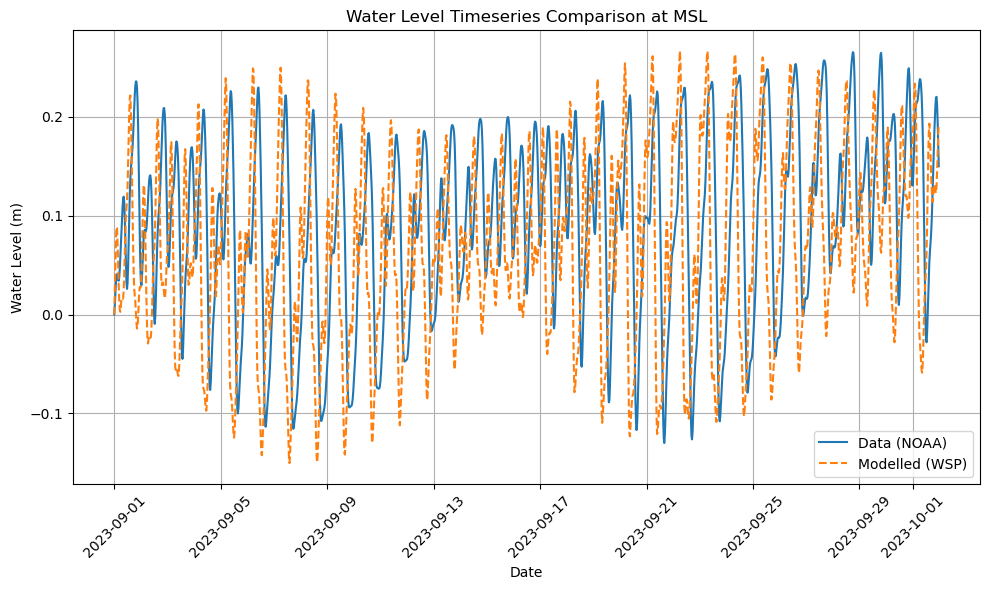

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
data1 = pd.read_csv(r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\Vaca_MSL_NOAA.csv')
data2 = pd.read_csv(r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\vaca_waterlevel_output.csv')

# Combine date and time columns into a single datetime column for the first dataset
data1['datetime'] = pd.to_datetime(data1['Date'] + ' ' + data1['Time (GMT)']).dt.tz_localize('GMT')

# Convert the relevant column in data1 from feet to meters
data1['Predicted (ft)'] = data1['Predicted (ft)'] * 0.3048  # Replace 'value_column_1' with the actual column name for water levels

# Change the timezone of the second dataset's datetime column from GMT-4 to GMT
data2['datetime'] = pd.to_datetime(data2['date and time']).dt.tz_localize('Etc/GMT+4').dt.tz_convert('GMT')

# Merge the two datasets based on the 'datetime' column to include only matching timestamps
merged_data = pd.merge(data1, data2, on='datetime', how='inner', suffixes=('_1', '_2'))

# Normalize both time series to start at 0 (subtract the first value from each series)
merged_data['normalized_series1'] = merged_data['Predicted (ft)'] - merged_data['Predicted (ft)'].iloc[0]
merged_data['normalized_series2'] = merged_data['water level (points) (m)'] - merged_data['water level (points) (m)'].iloc[0]

# Plot the two normalized time series
plt.figure(figsize=(10, 6))
plt.plot(merged_data['datetime'], merged_data['normalized_series1'], label='Data (NOAA)')
plt.plot(merged_data['datetime'], merged_data['normalized_series2'], label='Modelled (WSP)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.title('Water Level Timeseries Comparison at MSL')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('your_file.csv')

# Assuming the CSV file has columns 'Date' and 'Water Level'
# Convert the 'Date' column to datetime format
df['date and time'] = pd.to_datetime(df['date and time'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['date and time'], df[''water level (points) (m)'], label='Water Level', color='b')

# Add title and labels
plt.title('Water Level Over Time')
plt.xlabel('Date')
plt.ylabel('Water Level (units)')
plt.grid(True)
plt.legend()